## This notebook is part of Hadoop and Spark training delivered by IT-DB group
### SPARK DataFrame2 Hands-On Lab
_ by Prasanth Kothuri _

### Hands-On 1 - Construct a DataFrame from parquet file
*This demostrates how to read a parquet file and construct a DataFrame*

#### First lets create spark session  (spark), the entry point to programming Spark with the DataFrame and SQL API

In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder \
        .master("local[*]") \
        .appName("DataFrame HandsOn") \
        .config("spark.driver.memory", "4g") \
        .getOrCreate()

In [3]:
#from pyspark import SparkContext, SQLContext, SparkConf
#conf = SparkConf().setMaster("local")
#sc = SparkContext(conf = conf)
#sqlContext = SQLContext(sc)

#### Read the parquet file into DataFrame

In [4]:
df = spark.read.parquet('../data/UN_Pop_Stats.parquet')

#### Inspect the data

In [5]:
df.show(2)

+-----+-------------+-----+--------+------+---------+-----+------+------+-----------+----------+-------+
|LocID|     Location|VarID| Variant|  Time|MidPeriod|SexID|   Sex|AgeGrp|AgeGrpStart|AgeGrpSpan|  Value|
+-----+-------------+-----+--------+------+---------+-----+------+------+-----------+----------+-------+
|    4|"Afghanistan"|    2|"Medium"|"1950"|   1950.5|    1|"Male"| "0-4"|          0|         5|630.044|
|    4|"Afghanistan"|    2|"Medium"|"1950"|   1950.5|    1|"Male"| "5-9"|          5|         5|516.205|
+-----+-------------+-----+--------+------+---------+-----+------+------+-----------+----------+-------+
only showing top 2 rows



#### Print the schema of the DataFrame

In [6]:
df.printSchema()

root
 |-- LocID: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- VarID: string (nullable = true)
 |-- Variant: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- MidPeriod: string (nullable = true)
 |-- SexID: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- AgeGrp: string (nullable = true)
 |-- AgeGrpStart: string (nullable = true)
 |-- AgeGrpSpan: string (nullable = true)
 |-- Value: string (nullable = true)



#### Hands-On 2 - Calculate the year wise population of switzerland
*This shows how to query dataframes and how to show explain plan*

#### first, lets import the bits we need

In [7]:
import pyspark.sql.functions as func

#### year wise population for all countries
*you can see how you can filter, groupBy, aggregate and sort the dataframe*

In [8]:
y_df = df.filter(df.Sex == '"Both"') \
    .groupBy(df.Location,df.Time) \
    .agg(func.sum(df.Value*1000) \
    .alias("Sum")) \
    .orderBy(df.Time)

#### filter out for switzerland (or for that matter your country of choice)
*you can see how select can be used on dataframes to select the columns you need*

In [9]:
c_df = y_df.filter(df.Location == '"Switzerland"') \
    .select(df.Time,"Sum") \
    .collect()

In [10]:
print(c_df)

[Row(Time=u'"1950"', Sum=4668088.0), Row(Time=u'"1955"', Sum=4970810.0), Row(Time=u'"1960"', Sum=5296120.0), Row(Time=u'"1965"', Sum=5829958.0), Row(Time=u'"1970"', Sum=6169357.0), Row(Time=u'"1975"', Sum=6356178.0), Row(Time=u'"1980"', Sum=6303608.0), Row(Time=u'"1985"', Sum=6455680.0), Row(Time=u'"1990"', Sum=6673920.0), Row(Time=u'"1995"', Sum=7017042.0), Row(Time=u'"2000"', Sum=7165581.0), Row(Time=u'"2005"', Sum=7408608.0), Row(Time=u'"2010"', Sum=7830534.0), Row(Time=u'"2015"', Sum=8298663.0), Row(Time=u'"2020"', Sum=8654271.0), Row(Time=u'"2025"', Sum=8951789.0), Row(Time=u'"2030"', Sum=9222938.0), Row(Time=u'"2035"', Sum=9456989.0), Row(Time=u'"2040"', Sum=9660020.0), Row(Time=u'"2045"', Sum=9844509.0), Row(Time=u'"2050"', Sum=10019102.0), Row(Time=u'"2055"', Sum=10172276.0), Row(Time=u'"2060"', Sum=10304082.0), Row(Time=u'"2065"', Sum=10424466.0), Row(Time=u'"2070"', Sum=10542609.0), Row(Time=u'"2075"', Sum=10660384.0), Row(Time=u'"2080"', Sum=10775329.0), Row(Time=u'"2085"', 

#### plot the results using matlibplot

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


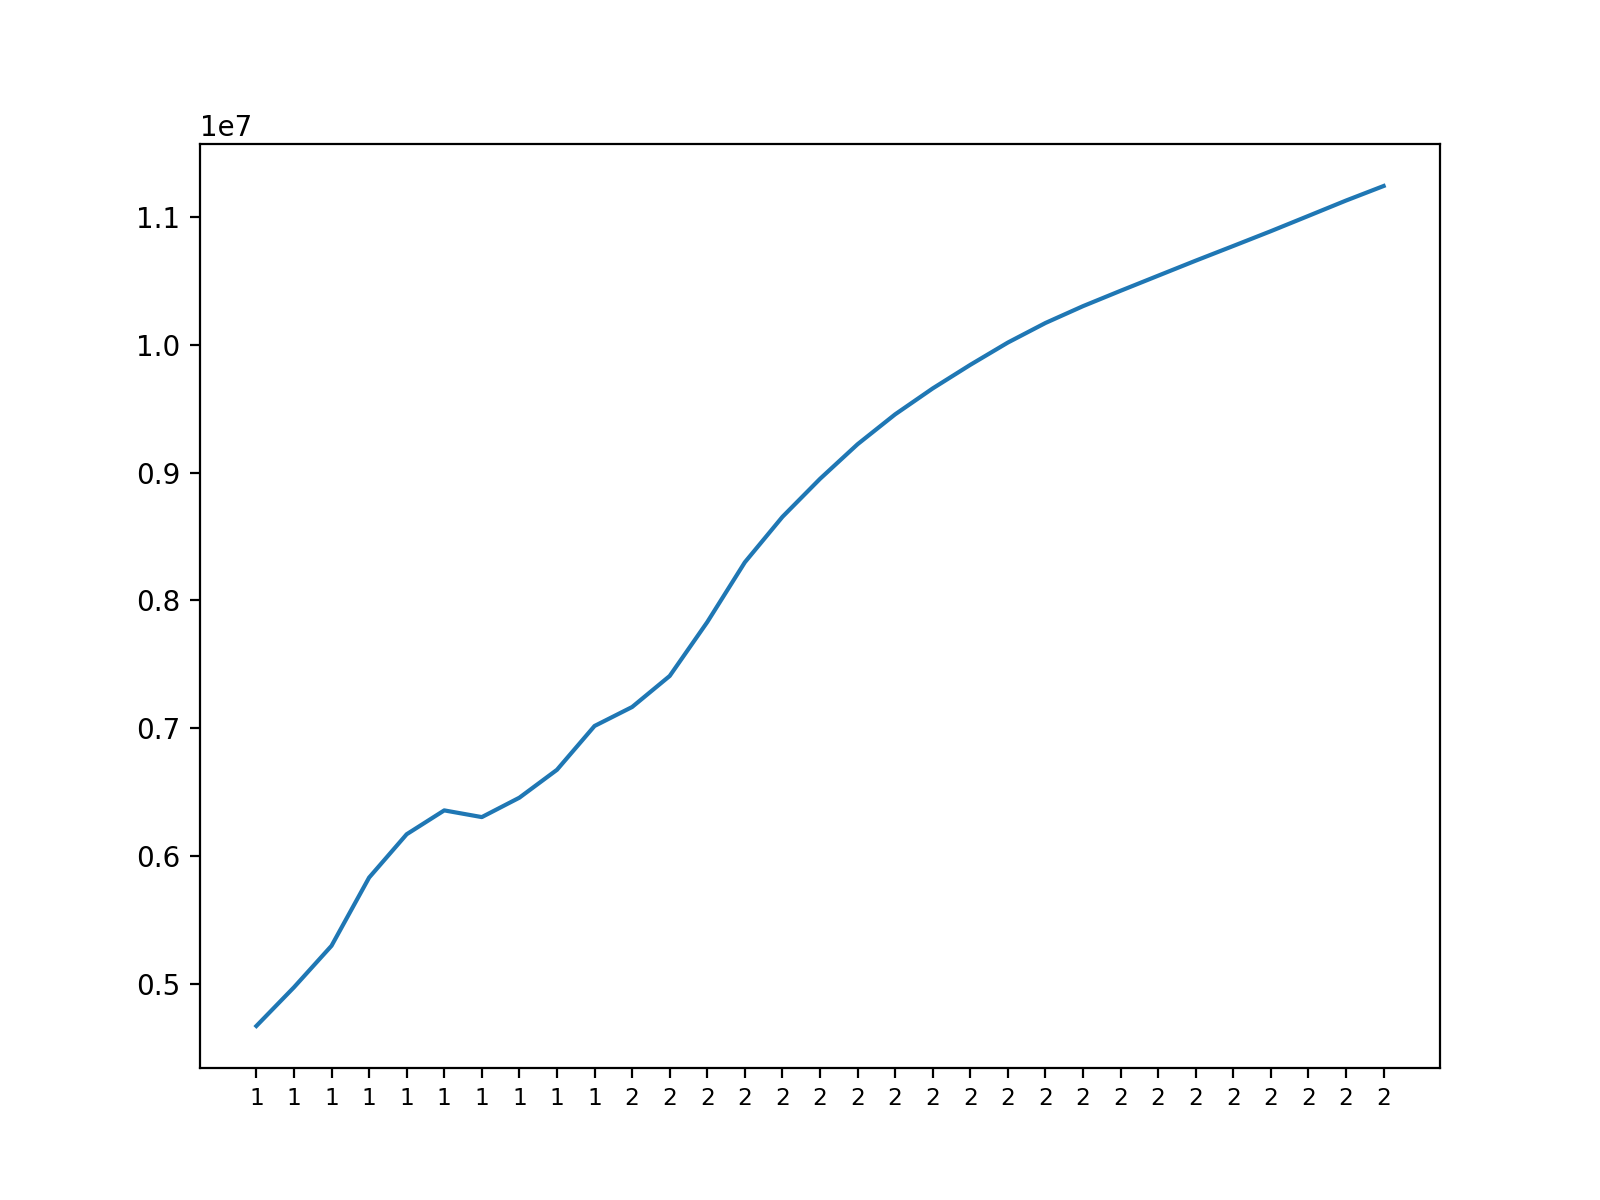

In [12]:
plt.figure(figsize=(8,6))
x_val = [x[0][1] for x in c_df]
y_val = [x[1] for x in c_df]
plt.plot(range(len(y_val)), y_val)
plt.xticks(range(len(x_val)), x_val, size='small')
plt.show()

#### finally you can view the explain plan generated by catalyst optimizer

In [1]:
y_df.explain()

NameError: name 'y_df' is not defined

### Hands-On 3 - This demostrates how DataFrame can be persisted as table and issue queries against it

#### Load the whitehouse vistor records parquet file into DataFrame

In [14]:
wh_df = spark.read.parquet("../data/WH_VR.parquet")

#### Print the schema to understand the layout

In [15]:
wh_df.printSchema()

root
 |-- NAMELAST: string (nullable = true)
 |-- NAMEFIRST: string (nullable = true)
 |-- NAMEMID: string (nullable = true)
 |-- UIN: string (nullable = true)
 |-- BDGNBR: string (nullable = true)
 |-- ACCESS_TYPE: string (nullable = true)
 |-- TOA: string (nullable = true)
 |-- APPT_MADE_DATE: string (nullable = true)
 |-- APPT_START_DATE: date (nullable = true)
 |-- APPT_END_DATE: string (nullable = true)
 |-- APPT_CANCEL_DATE: string (nullable = true)
 |-- Total_People: string (nullable = true)
 |-- LAST_UPDATEDBY: string (nullable = true)
 |-- POST: string (nullable = true)
 |-- LASTENTRYDATE: string (nullable = true)
 |-- TERMINAL_SUFFIX: string (nullable = true)
 |-- visitee_namelast: string (nullable = true)
 |-- visitee_namefirst: string (nullable = true)
 |-- MEETING_LOC: string (nullable = true)
 |-- MEETING_ROOM: string (nullable = true)
 |-- CALLER_NAME_LAST: string (nullable = true)
 |-- CALLER_NAME_FIRST: string (nullable = true)
 |-- description: string (nullable = true

#### Inspect the data

In [17]:
wh_df.select("NAMELAST","APPT_START_DATE").show(10)

+-----------+---------------+
|   NAMELAST|APPT_START_DATE|
+-----------+---------------+
|Adamopoulos|           null|
|    Brosman|           null|
|  Brumfield|           null|
|    Chipman|           null|
|      Chubb|           null|
|  Colasante|           null|
|     Conway|           null|
|        Cox|           null|
|     Curtis|           null|
|        Day|           null|
+-----------+---------------+
only showing top 10 rows



#### persist the DataFrame as temporary table

In [18]:
wh_df.registerTempTable("Vistor_Records")

#### You can now use issue the queries against this table using sqlContext.sql interface
*Count the vistors by last name*

In [19]:
count_by_name = spark.sql("select NAMELAST, count(1) as count from Vistor_Records group by NAMELAST order by count desc")

In [20]:
count_by_name.show()

+--------+-----+
|NAMELAST|count|
+--------+-----+
|   Smith|25908|
| Johnson|21491|
|Williams|18228|
|   Brown|16804|
|   Jones|16023|
|   SMITH|14565|
|  Miller|12942|
|   Davis|12263|
| JOHNSON|12157|
|     Lee|10151|
|WILLIAMS|10147|
|   BROWN| 9847|
|   JONES| 9269|
|Anderson| 9064|
|  Thomas| 8779|
|  Wilson| 8604|
|  Taylor| 8242|
| Jackson| 8146|
|Thompson| 7911|
|   Moore| 7855|
+--------+-----+
only showing top 20 rows



*count the number of vistors by year*

In [21]:
count_by_day = spark.sql("select year(APPT_START_DATE), count(1) as count from Vistor_Records \
    where APPT_START_DATE is not null \
    group by year(APPT_START_DATE) \
    order by year(APPT_START_DATE)").collect()

<IPython.core.display.Javascript object>


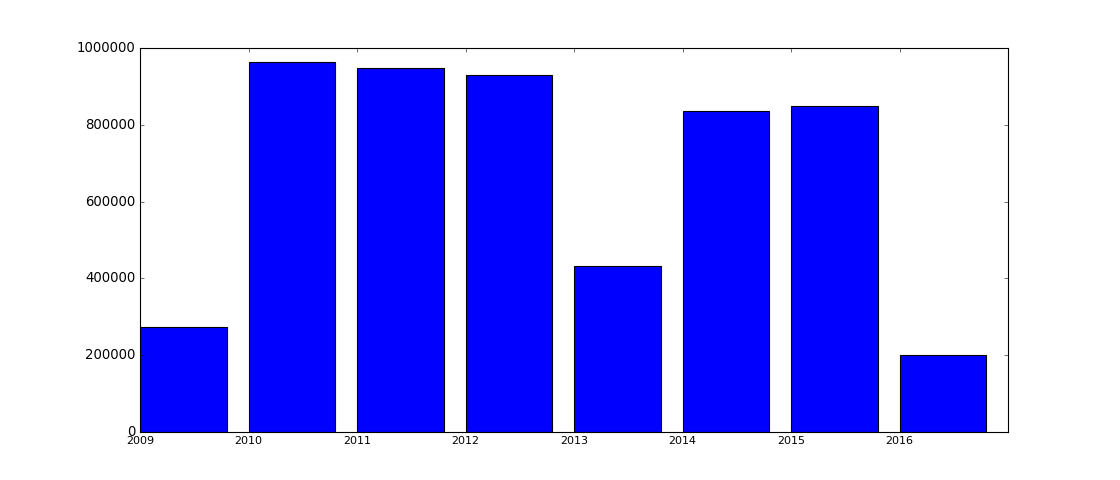

In [22]:
plt.figure(figsize=(14,6))
x_val = [x[0] for x in sorted(count_by_day)]
y_val = [x[1] for x in sorted(count_by_day)]
plt.bar(range(len(y_val)), y_val)
plt.xticks(range(len(x_val)), x_val, size='small')
plt.show()

#### Count the number of vistors by weekday
*This demonstrates how you can create UDF - user defined function*

In [23]:
from datetime import datetime
from pyspark.sql.types import StringType
def get_weekday(str):
    return str.strftime("%A")
spark.catalog.registerFunction("get_weekday", lambda x: \
                            get_weekday(x), \
                            StringType())

In [24]:
count_by_wday = spark.sql("select get_weekday(APPT_START_DATE), count(1) as count from Vistor_Records \
    where APPT_START_DATE is not null \
    group by get_weekday(APPT_START_DATE) \
    order by count desc")

In [25]:
count_by_wday.show()

+----------------------------+-------+
|get_weekday(APPT_START_DATE)|  count|
+----------------------------+-------+
|                      Friday|1099089|
|                    Saturday|1039378|
|                     Tuesday| 944460|
|                    Thursday| 912308|
|                   Wednesday| 902502|
|                      Monday| 362049|
|                      Sunday| 172281|
+----------------------------+-------+



#### Finally lets produce histogram on the group size

In [26]:
group_size = spark.sql("select distinct UIN, Total_People from Vistor_Records \
    where Total_People > 30 \
    and Total_People < 200").collect()

<IPython.core.display.Javascript object>


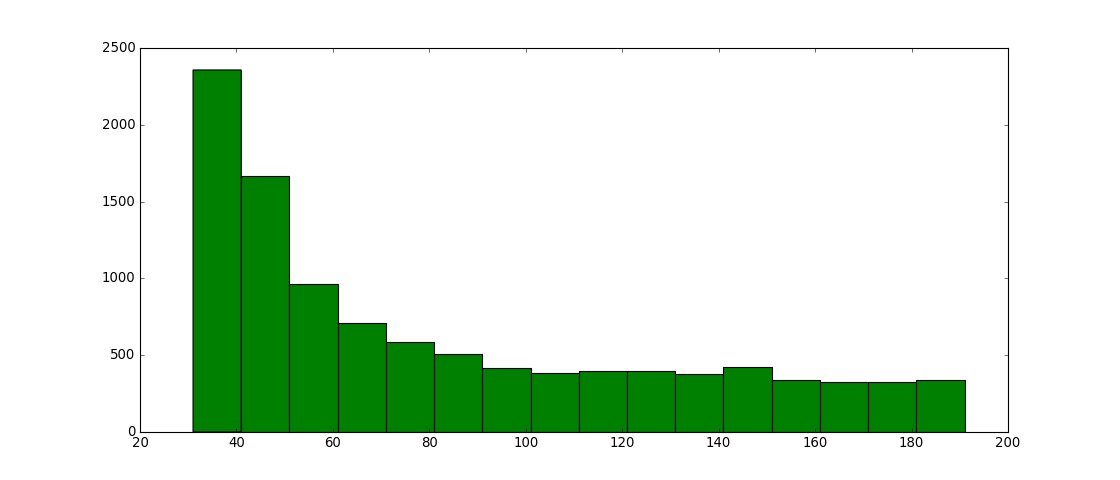

31 199


In [27]:
import numpy as np
plt.figure(figsize=(14,6))
x_val = [int(x[1]) for x in group_size]
print min(x_val),max(x_val)
bins = np.arange(min(x_val), max(x_val), 10) 
n, bins, patches = plt.hist(x_val, bins=bins, facecolor='green')

### Hands-On 4 - Construct the dataframes using json
*This demonstrates how json can be manipulated using dataframes*

#### Read a json into a dataframe

In [28]:
df_json = spark.read.json('../data/meetup-final.json.gz')

#### dataframe can infer schema from json file

In [29]:
df_json.printSchema()

root
 |-- event: struct (nullable = true)
 |    |-- event_id: string (nullable = true)
 |    |-- event_name: string (nullable = true)
 |    |-- event_url: string (nullable = true)
 |    |-- time: long (nullable = true)
 |-- group: struct (nullable = true)
 |    |-- group_city: string (nullable = true)
 |    |-- group_country: string (nullable = true)
 |    |-- group_id: long (nullable = true)
 |    |-- group_lat: double (nullable = true)
 |    |-- group_lon: double (nullable = true)
 |    |-- group_name: string (nullable = true)
 |    |-- group_state: string (nullable = true)
 |    |-- group_topics: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- topic_name: string (nullable = true)
 |    |    |    |-- urlkey: string (nullable = true)
 |    |-- group_urlname: string (nullable = true)
 |-- guests: long (nullable = true)
 |-- member: struct (nullable = true)
 |    |-- member_id: long (nullable = true)
 |    |-- member_name: string (nullabl

#### Top events by rsvp's

In [30]:
df_json.groupBy(df_json.event.event_name,df_json.group.group_city,df_json.venue.venue_name) \
    .count() \
    .orderBy("count", ascending = False) \
    .show()

+--------------------+-------------------+--------------------+-----+
| event['event_name']|group['group_city']| venue['venue_name']|count|
+--------------------+-------------------+--------------------+-----+
|Kundalini Yoga an...|          Las Vegas|RYK Yoga and Medi...|  371|
|July meetup (on a...|           New York|                null|  114|
|    FRIDAY Badminton|             London|Chobham Academy, ...|  104|
|Advanced basketba...|             London|                null|   90|
|Come to FREE Engl...|           New York|St Giles Internat...|   64|
|React Sydney July...|             Sydney|          BlueChilli|   60|
|Election Extravag...|          Melbourne|                null|   54|
|Entrepreneurs Bre...|           New York|           Insperity|   52|
|Mini Curso Gratui...|          São Paulo|         .NET CODERS|   50|
|Let's watch a mov...|        Los Angeles|                null|   50|
|Holiday Party * A...|    Fort Lauderdale|   Boca Resto Lounge|   48|
|Best of Criteo La..

#### what if the json contains an array, no problem we can explode it

In [31]:
from pyspark.sql.functions import explode

In [32]:
df_json.select(df_json.event.event_name,explode("group.group_topics")).show()

+--------------------+--------------------+
|    event.event_name|                 col|
+--------------------+--------------------+
|Saturday Morning ...|[Weight Loss,weig...|
|Saturday Morning ...|[Nutrition,nutrit...|
|Saturday Morning ...|[Half Marathon,ha...|
|Saturday Morning ...|   [Fitness,fitness]|
|Saturday Morning ...|    [Bicycling,bike]|
|Saturday Morning ...|     [Hiking,hiking]|
|Saturday Morning ...|   [Running,running]|
|Saturday Morning ...|[Exercise,excercise]|
|Saturday Morning ...|[Weight Loss Supp...|
|Saturday Morning ...|[Outdoor  Fitness...|
|Saturday Morning ...| [Marathon,marathon]|
|Saturday Morning ...|[Racewalking,race...|
|Saturday Morning ...|[stretching,stret...|
|Saturday Morning ...|[Mountain Biking,...|
|Saturday Morning ...|[Core Strength Tr...|
|Last Minute Laser...|[Fun Times,fun-ti...|
|Last Minute Laser...|[Activities,activ...|
|Last Minute Laser...|[Game Night,game-...|
|Last Minute Laser...|[Board Games,boar...|
|Last Minute Laser...|[Games: Pa